# ASM 59100 - Lab 2
# Exploring USDA NASS Data using Python

In this lab, you will be exposed to basic exploratory data analysis techniques using Python. The objectives of this lab are as follows:

    1) Setup Anaconda and Jupyter Notebooks
    2) Download a publicly available dataset
    3) Import the data using Pandas 
    4) Parse and clean the data 
    5) Loop over the dataset in order to find specific items within the datasets
    6) Use different plotting tools in order to represent the data visually
    7) Observe and report trends from the dataset
 

# Part 1: Processing Data

## 1. Acquire the U.S Historical Corn Prices Dataset.

The United States Department of Agriculture (USDA) National Agricultural Statistical Service (NASS) hosts a large collection of agricultural data, from the National Ag Census, to monthly and/or county-level agricultural data. 

Begin at the USDA NASS website: https://www.nass.usda.gov/

We'll walk through the process for obtaining a National dataset of Corn Prices as part of this lab. You'll learn how to craft a query using the NASS Quick Stats web interface, and this will give you a feel for how data is organized. Once you're familiar with how to query NASS, you can explore and see what other data is out there! 

Follow the steps in order to obtain the dataset (you may have to wait a few seconds before the next step loads on the website). The image below shows what your selection should look like before you hit the "Get Data" button in step 15.

   1) Navigate to the **Data and Statistics** tab
   
   2) Click on **Access Quick Stats**
   
   3) Under **Program**, select **Survey**
   
   4) Under **Sector**, select **Crops**
   
   5) Under **Group**, select **Field Crops**
   
   6) Under **Commodity**, select **Corn**
   
   7) Under **Category**, select **Price Received**
   
   8) Under **Data Item**, select **Corn, Grain, - Price Received Measured in Dollar/Bu**
   
   9) Under **Domain**, select **Total**
   
   10) Under **Geographic Level**, select **State**
   
   11) Under **State**, hold **SHIFT** and select all the states
   
   12) Under **Year**, hold **SHIFT** and select years from 1997 to 2021
   
   13) Under **Period Time**, select **Annual**
   
   14) Under **Period**, select **Marketing Year**
   
   15) Click on **Get Data**
   
   16) After the data loads after a few minutes, select on **Spreadsheet** on the upper right corner

<img src="img/Capture.PNG"/>

The file we have downloaded is in an Excel spreadsheet format. Open this file with Excel, and "Export" it as a CSV file.

**Name the file "dirty-cornprices.csv" since this data is raw and has not been cleaned. Place this file in the same folder as your Lab 2 Jupyter Notebook file.** 

Push your changes to github and confirm that this CSV file is also in your repository now!

Open the CSV in a spreadsheet software like Excel. You'll notice a lot of empty columns. Scroll through the "Value" column, that is the value of "Corn, Grain - Price Received, Measured in $ / Bu". You'll notice a few entries that are " (NA)" -- this means the data was Not Available and it was marked as missing. 

These are the types of things that require "cleaning". We'll do this in Python next.

## 2. Import the data using Pandas 

In [538]:
# import pandas, matplotlib.pyplot, and numpy libraries as pd, plt, and np, respectively. 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
# Enter code here ...

**First, use the "read_csv()" function in pandas to import the "dirty-cornprices.csv" file into a pandas DataFrame: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html**

Note: instead of using a standard "print", we've simply written the name of the variable, and Python has inbuilt functionality to print out DataFrame in a neatly formatted manner. 
Note Note: This neatly formatted manner is a combination of the head() and tail () functions.

In [539]:
# Use pandas to read the file "dirty-cornprices.csv" 
dirty_CORN = pd.read_csv('dirty-cornprices.csv') # Enter code here ...

# Print the data frame called "dirty_CORN"
dirty_CORN

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2020,MARKETING YEAR,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,4.15,NaN
1,SURVEY,2020,MARKETING YEAR,NaN,STATE,ARIZONA,4,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,5,NaN
2,SURVEY,2020,MARKETING YEAR,NaN,STATE,ARKANSAS,5,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,3.95,NaN
3,SURVEY,2020,MARKETING YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,4.5,NaN
4,SURVEY,2020,MARKETING YEAR,NaN,STATE,COLORADO,8,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,4.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,SURVEY,1997,MARKETING YEAR,NaN,STATE,VIRGINIA,51,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,2.69,NaN
998,SURVEY,1997,MARKETING YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,3,NaN
999,SURVEY,1997,MARKETING YEAR,NaN,STATE,WEST VIRGINIA,54,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,2.8,NaN
1000,SURVEY,1997,MARKETING YEAR,NaN,STATE,WISCONSIN,55,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,2.34,NaN


## 3. Inspect the Data

Now that you have imported the data, let's print the first 5 rows of the data to ensure the data was imported correctly. 

**Use the "head()" function to show us the first few rows of the data: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html**

In [540]:
# Show the start of the data using the head function
dirty_CORN.head()
# Enter code here ...

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2020,MARKETING YEAR,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,4.15,NaN
1,SURVEY,2020,MARKETING YEAR,NaN,STATE,ARIZONA,4,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,5,NaN
2,SURVEY,2020,MARKETING YEAR,NaN,STATE,ARKANSAS,5,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,3.95,NaN
3,SURVEY,2020,MARKETING YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,4.5,NaN
4,SURVEY,2020,MARKETING YEAR,NaN,STATE,COLORADO,8,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,4.7,NaN


**Use the "tail()" function to display the last 5 rows, or "tail" of the dataset: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html?**

In [541]:
# Show the end of the data using the tail function
dirty_CORN.tail()
# Enter code here ...

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
997,SURVEY,1997,MARKETING YEAR,NaN,STATE,VIRGINIA,51,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,2.69,NaN
998,SURVEY,1997,MARKETING YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,3,NaN
999,SURVEY,1997,MARKETING YEAR,NaN,STATE,WEST VIRGINIA,54,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,2.8,NaN
1000,SURVEY,1997,MARKETING YEAR,NaN,STATE,WISCONSIN,55,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,2.34,NaN
1001,SURVEY,1997,MARKETING YEAR,NaN,STATE,WYOMING,56,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,2.52,NaN


**1. CANDIDATE FOR CLEANING:** "NaN" stands for "Not a Number". This means the data is missing and the column is a candidate to be removed.

Let's sort the dataset by the 'Value' column to see if the data is uniformly numbers, or if any erroneous letters or other junk data exist. 

**Use the "sort_values()" function to sort by the 'Value; Column': https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html**

In [542]:
#Sort by 'Value'
dirty_CORN.sort_values('Value')
#Enter code here...

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
120,SURVEY,2018,MARKETING YEAR,NaN,STATE,RHODE ISLAND,44,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,(NA),NaN
176,SURVEY,2017,MARKETING YEAR,NaN,STATE,VERMONT,50,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,(NA),NaN
83,SURVEY,2018,MARKETING YEAR,NaN,STATE,ALASKA,2,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,(NA),NaN
170,SURVEY,2017,MARKETING YEAR,NaN,STATE,RHODE ISLAND,44,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,(NA),NaN
88,SURVEY,2018,MARKETING YEAR,NaN,STATE,CONNECTICUT,9,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,(NA),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,SURVEY,2012,MARKETING YEAR,NaN,STATE,SOUTH CAROLINA,45,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,7.5,NaN
351,SURVEY,2012,MARKETING YEAR,NaN,STATE,DELAWARE,10,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,7.55,NaN
381,SURVEY,2012,MARKETING YEAR,NaN,STATE,UTAH,49,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,7.59,NaN
347,SURVEY,2012,MARKETING YEAR,NaN,STATE,ARIZONA,4,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",TOTAL,NOT SPECIFIED,7.84,NaN


**2. CANDIDATE FOR CLEANING:** We see the phrase " (NA)" rise to the top, indicated data is Not Available. We'll need to remove these rows later too. Run the following code to see how many rows we'll need to delete!

In [543]:
#Run this code
dirty_CORN['Value'].str.contains('NA').sum()

18

It's a good idea check the size of the data to ensure you haven't lost useful data. It's a good practice to check the size of the data at multiple points during your assignment.

**Use the "shape" method: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html**

In [544]:
# Show the size of the dataset (rows, cols)
dirty_CORN.shape
# Enter code here ...

(1002, 21)

## 4. Clean the data

Let's start by removing the columns with missing data that we found earlier - the columns consisting only "NaN".

**Use the ".dropna()" function to remove all data entries with missing values. For help with this task, consult this tutorial: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html. Hint: You will use three parameters: how, axis, and inplace.**

In [545]:
# Remove empty columns from raw_data. Show the head of the data to see what columns remain.
dirty_CORN = dirty_CORN.dropna(axis=1)

# Enter code here ...

We'lll have to manually remove a few more rows with missing or repetitive columns that are't useful: columns "Program", "Geo Level", "watershed_code", "Commodity", "Domain", and "Domain Category" can all go. Let's drop them too!

**Use the "drop()" function in order to specify which columns to remove: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html**

In [546]:
# Remove columns the following columns: 'Program', 'Geo Level', 'Commodity', 'watershed_code', 'Domain', 'Domain Category'. 
# Display the head() to see what remains.
dirty_CORN = dirty_CORN.drop(columns=['Program', 'Geo Level', 'Commodity', 'watershed_code', 'Domain', 'Domain Category'])
# Enter code here ...

In [547]:
# Print the shape of the data to ensure the empty columns have been removed, and that no rows have been lost.
dirty_CORN.shape
# Enter code here ...

(1002, 6)

Next, let's remove the rows with " (NA)" in them.

**Remove the rows containing ' (NA)' in the 'Value' column using the "drop()" function.** To identify the rows that need removing, you will first subset the DataFrame using an appropriate boolean expression and then apply the "index" method (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html). 

**For example, the expression dirty_CORN[dirty_CORN['Year'] == 2020] will output only the entries where the Year column entry is 2020. You'll need to construct a similar expression to find the ' (NA)' Values**

In [548]:
# some of the values are missing and contain the string " (NA)"
# First identify the offending rows by subsetting the array. Use the index and remove those rows from unclean.
dirty_CORN = dirty_CORN[dirty_CORN.Value.str.contains('NA') == False]
dirty_CORN
# Enter code here ...

,Year,Period,State,State ANSI,Data Item,Value
0,2020,MARKETING YEAR,ALABAMA,1,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",4.15
1,2020,MARKETING YEAR,ARIZONA,4,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",5
2,2020,MARKETING YEAR,ARKANSAS,5,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3.95
3,2020,MARKETING YEAR,CALIFORNIA,6,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",4.5
4,2020,MARKETING YEAR,COLORADO,8,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",4.7
...,...,...,...,...,...,...
997,1997,MARKETING YEAR,VIRGINIA,51,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.69
998,1997,MARKETING YEAR,WASHINGTON,53,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3
999,1997,MARKETING YEAR,WEST VIRGINIA,54,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.8
1000,1997,MARKETING YEAR,WISCONSIN,55,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.34


Run the code in the block below. You'll notice that the Value column has the variable type str, that is a "String", which is usually used to represent text. We need this to be a float, a number, so that we can plot it later!

In [549]:
#Run this code
type(dirty_CORN['Value'][0])

str

**Because of the ' (NA)', the 'Value' column was imported as a string. This will cause issues when plotting. We can convert the "Value" column to float using the "astype()" function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html**

In [550]:
# Replace the dirty_CORN['Value'] column with the same values except with the type 'float'
dirty_CORN['Value'].astype('float64')
#Enter code here...

0       4.15
1       5.00
2       3.95
3       4.50
4       4.70
        ... 
997     2.69
998     3.00
999     2.80
1000    2.34
1001    2.52
Name: Value, Length: 984, dtype: float64

Currently, the data is organized with respect to the year in descending order. 

Let's sort the data using two criteria: first sort it alphabetically based on the State name (Alabama to Wyoming) and then in ascending year (from 1997 to 2021). 

**Use the "sort_values" function in order to complete this task: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html**

In [551]:
# Sort the data based on the State ANSI value (since the numbers increase alphabetically), and then the Year. 
dirty_CORN.sort_values(['State', 'Year'], inplace=True)
# Show your result
dirty_CORN
# Enter code here ...

,Year,Period,State,State ANSI,Data Item,Value
961,1997,MARKETING YEAR,ALABAMA,1,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.82
920,1998,MARKETING YEAR,ALABAMA,1,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.31
879,1999,MARKETING YEAR,ALABAMA,1,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.26
838,2000,MARKETING YEAR,ALABAMA,1,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.16
797,2001,MARKETING YEAR,ALABAMA,1,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.35
...,...,...,...,...,...,...
222,2016,MARKETING YEAR,WYOMING,56,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3.39
181,2017,MARKETING YEAR,WYOMING,56,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3.35
131,2018,MARKETING YEAR,WYOMING,56,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3.69
81,2019,MARKETING YEAR,WYOMING,56,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3.45


You might have noticed that the index looks like garbage. 

**Let's fix this using the "reset_index()" function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html Consider specifying the drop parameter as True** 



In [552]:
# The index is a mess because we've sorted the data and dropped rows. Reset the index. 
dirty_CORN.reset_index(drop=True, inplace=True)

# Enter code here ...

Your dataset is now "clean" and ready to plot. Let's save it as a new CSV file called "clean-cornprices.csv". 

**Use the ".to_csv" to save your data frame as a CSV file: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html**

In [553]:
# Save your data frame as a CSV file
dirty_CORN.to_json('clean-cornprices.json') # since I had errors converting to csv I converted the dataframe to json file

# Enter code here ...

## 5. Exploratory Data Analysis

Let's begin with some quick stats about the historical average price of Corn, in $/bushel, across all states each year. This also helps us confirm our ability to later plot the data.

**Use the "describe()" function, to show summary statistics for the "Value" column of our data frame: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?**

In [554]:
# Read the clean-cornprices.csv file into a new data frame called clean_CORN
# Enter code here ...
clean_CORN = pd.read_json('clean-cornprices.json')
# A quick data description of the average price of corn in 2020 across the U.S.
clean_CORN.Value.describe()
# Enter code here ...

count    984.000000
mean       3.664848
std        1.373694
min        1.530000
25%        2.450000
50%        3.680000
75%        4.352500
max        7.900000
Name: Value, dtype: float64

Let's see what data looks like on a graph. The column "Year" should be your x-axis, and the column "Value" (which corresponds to the $/bushel of corn) should be your y-axis.

**Use the "plot()" function in the matplotlib.pyplot library (reminder: imported as plt) to create a default "line" plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html**

Text(0.5, 1.0, 'Corn Price Value Over Time')

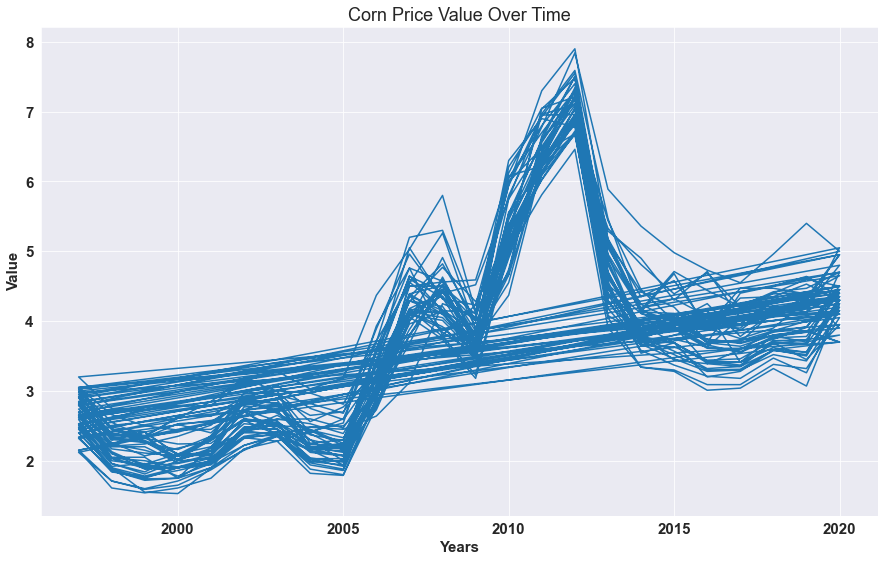

In [555]:
# Use matplotlib to create line plots for the corn value in $/Bu against year
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['figure.figsize'] = (15, 9)
matplotlib.rcParams['figure.edgecolor'] = 'black'
sns.set_style('darkgrid')
# I made some parameters to help with the plot appearance
# Create a plot to display all data all data
# Enter code here...
plt.plot(clean_CORN.Year, clean_CORN.Value)
plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Corn Price Value Over Time')
#Give your plot a title, x and y axis labels, and activate grid lines.

# Enter code here...

The default plot function gives us a messy graph of all states on one plot. Messy but a great first step! Note this graph is particularly messy because it's plotting all the states together - so there is a straight line zooming back and forth connecting the end of each plot to the start of the next! 

Next, we'll clean things up a little and plot more useful selections of our data.

## 6. Exploratory Data Analysis

### Plot 1: Average corn price in the US over time.

Let's create a graph that shows us the average price of corn, in $/bu, from 1997 - 2020.

**Use the groupby() and describe() functions to output a table describing the default summary statistics for each year: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?**

In [556]:
# Display summary stats grouped by Year
clean_CORN.groupby('Year').describe()
# Enter code here...

State ANSI                                                    Value  \
          count       mean        std  min   25%   50%   75%   max count   
Year                                                                       
1997       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
1998       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
1999       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2000       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2001       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2002       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2003       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2004       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2005       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2006       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2007       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2008       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2009       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2010       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2011       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2012       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2013       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2014       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2015       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2016       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2017       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2018       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2019       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   
2020       41.0  30.073171  15.886142  1.0  18.0  30.0  42.0  56.0  41.0   

                                                        
          mean       std   min   25%   50%   75%   max  
Year                                                    
1997  2.671220  0.272747  2.12  2.48  2.66  2.90  3.20  
1998  2.161463  0.269737  1.61  1.96  2.17  2.35  2.75  
1999  2.070732  0.295435  1.54  1.84  2.07  2.33  2.72  
2000  2.054634  0.289414  1.53  1.90  2.01  2.16  2.78  
2001  2.189512  0.255783  1.75  1.99  2.14  2.33  2.85  
2002  2.602195  0.267166  2.15  2.41  2.58  2.84  3.18  
2003  2.612195  0.254544  2.28  2.39  2.53  2.82  3.28  
2004  2.304390  0.282348  1.82  2.14  2.24  2.45  3.03  
2005  2.250732  0.305846  1.79  2.03  2.20  2.45  3.18  
2006  3.192195  0.365140  2.64  2.98  3.08  3.37  4.37  
2007  4.290244  0.408292  3.12  4.07  4.28  4.54  5.20  
2008  4.372195  0.423636  3.74  4.11  4.34  4.53  5.80  
2009  3.809268  0.312733  3.18  3.58  3.73  4.02  4.59  
2010  5.349268  0.501858  4.37  5.01  5.27  5.75  6.30  
2011  6.468293  0.347224  5.81  6.22  6.40  6.70  7.30  
2012  7.102439  0.330846  6.46  6.86  7.09  7.30  7.90  
2013  4.748780  0.427108  3.91  4.47  4.67  5.09  5.89  
2014  3.974146  0.399218  3.34  3.75  3.85  4.15  5.36  
2015  3.932927  0.375681  3.28  3.69  3.92  4.05  4.98  
2016  3.761220  0.424483  3.01  3.42  3.71  4.00  4.73  
2017  3.743171  0.389875  3.04  3.41  3.70  4.02  4.55  
2018  3.958537  0.355250  3.32  3.70  3.86  4.16  4.96  
2019  3.992683  0.453299  3.07  3.68  3.99  4.30  5.40  
2020  4.343902  0.330378  3.70  4.15  4.30  4.50  5.05

Now that we know how to use the groupby() function, we can tweak it, combine it with the mean() function ONLY, and plot it!

We've included some basic commands in the next section to format your plot and get you started.

**Use the groupby() and mean() functions to output a table describing the default summary statistics for each year: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?**

**Use the plt.plot() function to plot everything: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html**

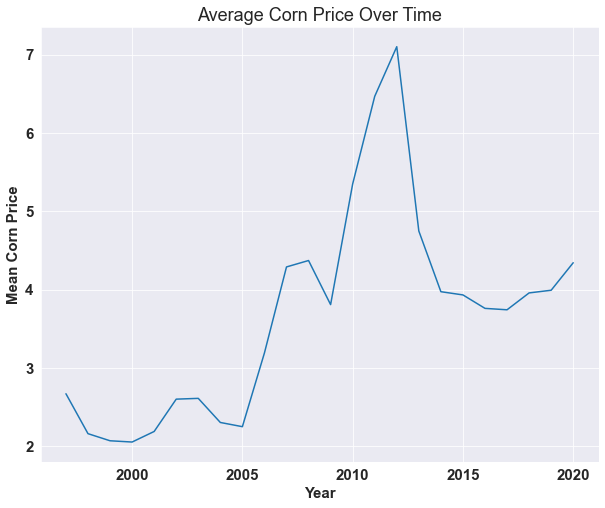

In [557]:
#Find the mean price of corn ('Value') for each year. Use the groupby() and mean() functions. 
mean_prices = clean_CORN.groupby('Year').Value.mean()
mean_prices
#Use plt.plot() to plot the result


# Some basic functionality to make the graphs larger
plt.figure(figsize=(10, 8))

# Create a plot for the mean US totals
# Enter code here...
plt.plot(mean_prices)
#Give your plot a title, x any y axis labels, and activate grid lines.
# Enter code here...
plt.xlabel('Year')
plt.ylabel('Mean Corn Price')
plt.title('Average Corn Price Over Time')
# Save the plot as a PNG file - check it out, you should have a file with this name in your folder now! 
# MAKE SURE YOU RUN THIS - I will expect this image in your submission folder
plt.savefig('meancorn', format='png', dpi=140)

### Plot 2: A single plot showing corn prices over time for Indiana, Iowa, and Illinois.

**For help with Pandas data frames, consult this tutorial: https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html. This reference will help you identify how to subset the data to obtain Indiana, Iowa, and Illinois values.**

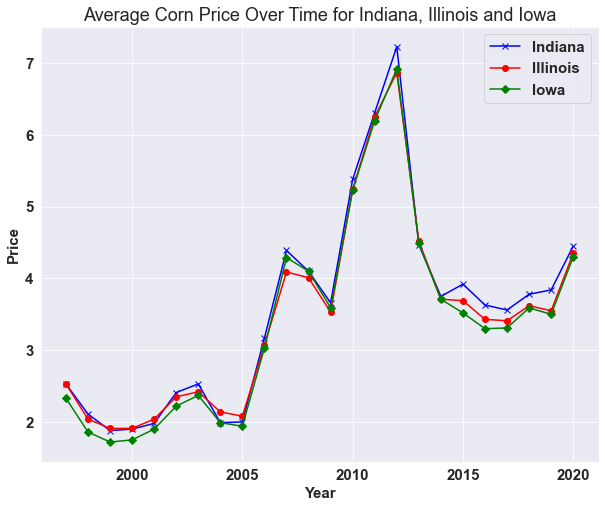

In [558]:
# Some basic functionality to make the graphs larger
plt.figure(figsize=(10, 8))

# Create plots for each of the three states. Make sure you include a 'label' in each plot for the legend.

# Enter code here...
indiana_df = clean_CORN[clean_CORN.State == 'INDIANA']
illinois_df = clean_CORN[clean_CORN.State == 'ILLINOIS']
iowa_df = clean_CORN[clean_CORN.State == 'IOWA']
mean_indiana = indiana_df.groupby('Year').Value.mean()
mean_illinois = illinois_df.groupby('Year').Value.mean()
mean_Iowa = iowa_df.groupby('Year').Value.mean()
plt.plot(mean_indiana, 'x-b')
plt.plot(mean_illinois, 'o-r')
plt.plot(mean_Iowa, 'D-g')
# Give your plot a title, plot x any y axis labels, a legend, and activate grid lines.
# Enter code here...
plt.title('Average Corn Price Over Time for Indiana, Illinois and Iowa')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['Indiana', 'Illinois', 'Iowa'])
# Save the plot as a PNG file - check it out, you should have a file with this name in your folder now! 
# MAKE SURE YOU RUN THIS - I will expect this image in your submission folder
plt.savefig('istatescorn', format='png', dpi=140)

### Plot 3: Plot the State with the highest and lowest average price, as well as the average US price, on one graph.

First, let's identify which States have the highest and lowest average prices. We'll do this in stages and there's a little trick with resetting the index so we'll help :)

In [559]:
#Use groupby() and mean() like we did before, to figure out the mean Values per State. 
# Assign the result to the variable "cornStateAverage"
cornStateAverage = clean_CORN.groupby(['State']).Value.mean()
cornStateAverage

# In the previous statement, you'll see that the Value column is no longer labeled, and we've lost our index column.
#(if you just type out "cornStateAverage" to see what the data frame looks like)
# This statement resets the index, i.e., it adds a column that indexes the whole data frame so that we can do 
# lookups again!
cornStateAverage = cornStateAverage.reset_index()
cornStateAverage

# Now you can simply use the min() function to identify which State has the lowest mean value.
# Enter code here...
cornStateAverage.min()

State     ALABAMA
Value    3.141667
dtype: object

In [560]:
# And use the max() function to identify which State has the lowest mean value.
# Enter code here...
cornStateAverage.max()

State     WYOMING
Value    4.479167
dtype: object

Now that we know which 2 states have the lowest and highest values, we can create plots for each of them, and add them to our graph that has the US Total averages.

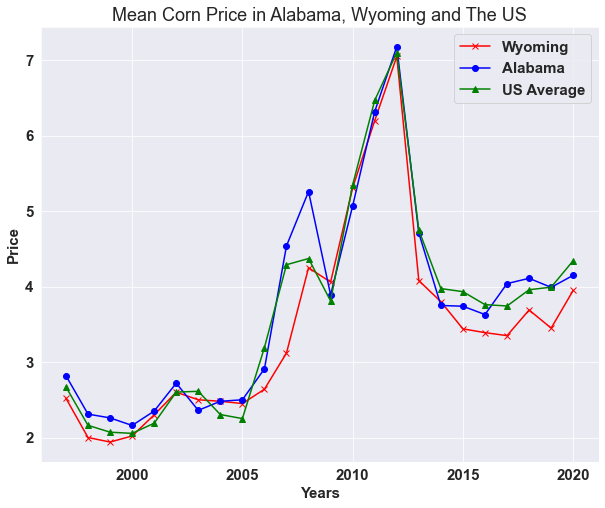

In [561]:
# Some basic functionality to make the graphs larger
plt.figure(figsize=(10, 8))
wyoming_df = clean_CORN[clean_CORN.State == 'WYOMING']
alabama_df = clean_CORN[clean_CORN.State == 'ALABAMA']
mean_wyoming = wyoming_df.groupby('Year').Value.mean()
mean_alabama = alabama_df.groupby('Year').Value.mean()
plt.plot(mean_wyoming, 'x-r')
plt.plot(mean_alabama, 'o-b')
#Plot line for the State with the max value. Make sure you include a 'label' for the legend.
# Enter code here...
plt.plot(mean_prices, '^-g')
plt.legend(['Wyoming', 'Alabama', 'US Average'])
plt.title('Mean Corn Price in Alabama, Wyoming and The US')
plt.xlabel('Years')
plt.ylabel('Price')
#Plot line for average US value (same as previous graph)
# Enter code here...

#Plot line for the State with the min value. Make sure you include a 'label' for the legend.
# Enter code here...

# Give your a title, plot x any y axis labels, a legend, and activate grid lines.
# Enter code here...

# Save the plot as a PNG file - check it out, you should have a file with this name in your folder now! 
# MAKE SURE YOU RUN THIS - I will expect this image in your submission folder
plt.savefig('corndeviation', format='png', dpi=140)

### Plot 4: A single plot that shows corn prices and ag land values overlayed for Indiana only.

Now, let's bring in some new data so that we can really learn more about how corn prices and agricultural land values affect each other.

We've already downloaded and cleaned a dataset for US Agricutlural Land Values from https://www.nass.usda.gov/ as shown in the image below:

<img src="img/Capture2.PNG"/>

We've already cleaned the data for you, just like you did in Steps 3 & 4 for the corn prices. The Ag Land Value dataset was a littler dirtier and we had to do a few extra things:
1. The Value column had some extra junk data: in addition to ' (NA)', we also found ' (D)', and ' (S)'.
2. The Values themselves couldn't be converted directly to floats as the strings representing the numbers had commas, e.g., "3,500". So we stripped the strings of the commas, and THEN converted to float.

We tell you this, just in case you'd like to download the data and try cleaning it yourself ;)

Let's load the new dataset in (if you cloned the github repository correctly, the following code should run just fine).

In [562]:
#Load agLandValue
agLandValue = pd.read_csv('aglandvalues-clean.csv')
agLandValue.drop

<bound method DataFrame.drop of       Unnamed: 0  Year          State  State ANSI  \
0              0  2021        ALABAMA         1.0   
1              1  2021        ARIZONA         4.0   
2              2  2021       ARKANSAS         5.0   
3              3  2021     CALIFORNIA         6.0   
4              4  2021       COLORADO         8.0   
...          ...   ...            ...         ...   
1059        1059  1997       VIRGINIA        51.0   
1060        1060  1997     WASHINGTON        53.0   
1061        1061  1997  WEST VIRGINIA        54.0   
1062        1062  1997      WISCONSIN        55.0   
1063        1063  1997        WYOMING        56.0   

                                              Data Item    Value  
0     AG LAND, CROPLAND - ASSET VALUE, MEASURED IN $...   3550.0  
1     AG LAND, CROPLAND - ASSET VALUE, MEASURED IN $...   7700.0  
2     AG LAND, CROPLAND - ASSET VALUE, MEASURED IN $...   2930.0  
3     AG LAND, CROPLAND - ASSET VALUE, MEASURED IN $...  13860.

Now, you'll create two plots for the state of Indiana ONLY. One to represent the clean corn price data from earlier, and the second to represent agricultural land values.

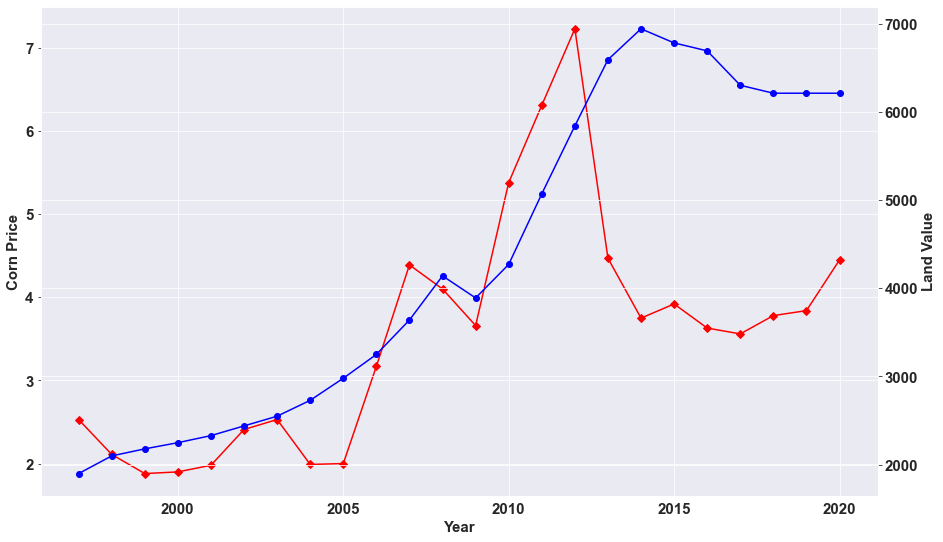

In [563]:
# You will need TWO Y axes (left and right) in one graph. Look up how to create a second Y axis.
indiana_land_value = agLandValue[agLandValue.State == 'INDIANA']
indiana_land_value = indiana_land_value.reset_index()
indiana_land_value.drop(columns=['index'], inplace=True)
indiana_land_value.drop(index=0, inplace=True)
indiana_land_value_mean = indiana_land_value.groupby('Year').Value.mean()

fig, corn_price = plt.subplots()

# Create a plot for corn prices in Indiana over time. Make sure you include a 'label' for the legend.
# Enter code here...
corn_price.plot(mean_indiana, 'D-r')
# Create a plot for agricultural land values in Indiana over time. Make sure you include a 'label' for the legend.
# Enter code here...
land_plot = corn_price.twinx()
land_plot.plot(indiana_land_value_mean, 'o-b')
land_plot.set_yscale('linear')

# Give your a title, plot x any y axis labels, a legend, and activate grid lines.
# Enter code here...
corn_price.set_xlabel('Year')
corn_price.set_ylabel('Corn Price')
land_plot.set_ylabel('Land Value')
# Save the plot as a PNG file - check it out, you should have a file with this name in your folder now! 
# MAKE SURE YOU RUN THIS - I will expect this image in your submission folder
plt.savefig('indiana-agland-cornprices', format='png', dpi=140)


What do you notice about this graph? Are there any interesting areas that you would want to explore further? Perhaps something that causes you to ask about what was happening in the world at that moment in time?

#### Double Click and Enter Response Here

Something interesting about the graph is that land value continued to increase over time even at time like the world economic crisis while the price of corn was still fluctuating I do not think that their price are related in any or more analysis should be done in order to verify a relationship between both.

That's all folks! You did it! AWESOME! Submit this lab via github as usual.

# The End